In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import PIL
from keras import layers
from keras.models import Model
from keras.layers import Input, Activation, Dense, Conv2D, Flatten, ZeroPadding2D, BatchNormalization
from keras.layers import MaxPooling2D, AveragePooling2D, Dropout, GlobalMaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
from random import seed 
from random import randint
from keras.preprocessing.image import load_img, save_img

Using TensorFlow backend.


In [2]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import keras.backend as K
K.set_image_data_format('channels_last')
from PIL import Image

In [3]:
directory = os.path.abspath("train")
print(directory)

C:\Users\Asus\Cat vs Dog Project\train


In [4]:
X = []
Y = []
i = 0
category = ['Cat', 'Dog']
for c in category:
    path = os.path.join(directory, c)
    for file in os.listdir(path):
        classes = category.index(c)
        Y.append(classes)
        img_path = os.path.join(path, file)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img_r = cv2.resize(img, (100, 100))
        X.append(img_r)
        
X_train = np.array(X)
Y_train = np.array(Y)
cv2.imshow("New Image", X_train[35])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
print(X_train.shape)

(25000, 100, 100, 3)


In [34]:
np.random.seed(1)
m = X_train.shape[0]
permutation = list(np.random.permutation(m))
X = X_train[permutation, :]
Y = Y_train[permutation]
X_train = X
Y_train = Y
cv2.imshow("new img", X_train[35])
print(Y_train[35])
cv2.waitKey(0)
cv2.destroyAllWindows()


1


In [7]:
print(type(X_train))
print(type(Y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
def model(Input_shape):
    X_input = Input(Input_shape)
    X = BatchNormalization(axis = 3, name = 'bn_0')(X_input)
    
    X = ZeroPadding2D((4, 4))(X)    
    X = Conv2D(32, (5, 5), strides = (2, 2), name = 'conv_1')(X)
    X = BatchNormalization(axis = 3, name = 'bn_1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), strides = None, name = 'mp_1')(X)
    
    X = ZeroPadding2D((2, 2))(X)  
    X = Conv2D(64, (3, 3), strides = (2, 2), padding = 'same', name = 'conv_2')(X)
    X = BatchNormalization(axis = 3, name = 'bn_2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(128, (2, 2), strides = (1, 1), padding = 'same', name = 'conv_3')(X)
    X = BatchNormalization(axis = 3, name = 'bn_3')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), strides = None, name = 'mp_3')(X)
    
    X = Flatten()(X)
    
    X = Dense(100, activation = 'relu', name = 'fc_0')(X)
    X = Dropout(rate = 0.3, noise_shape = None, seed = 1)(X)
    X = Dense(20, activation = 'relu', name = 'fc_1')(X)
    X = Dense(1, activation = 'sigmoid', name = 'output_layer')(X)
    model = Model(inputs = X_input, outputs = X, name = 'base_model')
    
    return(model)
    

In [9]:
mymodel = model((100, 100, 3))
mymodel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
mymodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
bn_0 (BatchNormalization)    (None, 100, 100, 3)       12        
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 108, 108, 3)       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 52, 52, 32)        2432      
_________________________________________________________________
bn_1 (BatchNormalization)    (None, 52, 52, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 52, 52, 32)        0         
_________________________________________________________________
mp_1 (MaxPooling2D)          (None, 26, 26, 32)        0         
__________

In [11]:
history = mymodel.fit(X_train, Y_train, batch_size = 64, epochs = 20, validation_split = 0.2)



Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 160s 8ms/step - loss: 0.6611 - acc: 0.6345 - val_loss: 0.5576 - val_acc: 0.7260
Epoch 2/20
20000/20000 [==============================] - 200s 10ms/step - loss: 0.5382 - acc: 0.7221 - val_loss: 0.5623 - val_acc: 0.7168
Epoch 3/20
20000/20000 [==============================] - 208s 10ms/step - loss: 0.4882 - acc: 0.7591 - val_loss: 0.5103 - val_acc: 0.7392
Epoch 4/20
20000/20000 [==============================] - 205s 10ms/step - loss: 0.4470 - acc: 0.7861 - val_loss: 0.4430 - val_acc: 0.8034
Epoch 5/20
20000/20000 [==============================] - 233s 12ms/step - loss: 0.4173 - acc: 0.8035 - val_loss: 0.4176 - val_acc: 0.8158
Epoch 6/20
20000/20000 [==============================] - 207s 10ms/step - loss: 0.3853 - acc: 0.8220 - val_loss: 0.3885 - val_acc: 0.8270
Epoch 7/20
20000/20000 [==============================] - 229s 11ms/step - loss: 0.3541 - acc: 0.8395 - val_loss: 0.

In [15]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

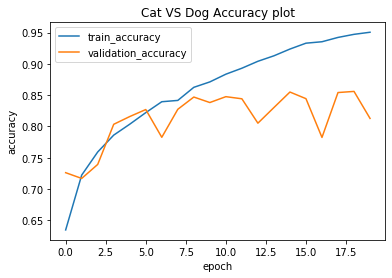

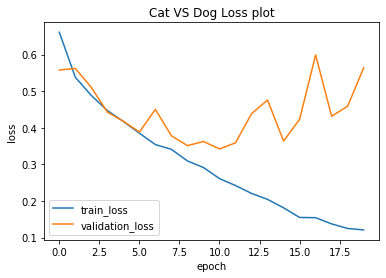

In [16]:

plot_accuracy(history,'Cat VS Dog Accuracy plot')
plot_loss(history,'Cat VS Dog Loss plot')

In [29]:
class_list = ['Cat','Dog']

def predict_class(model, images, show = True):
    for img in images:
        img = load_img(img, target_size=(100, 100))
        img = img_to_array(img)                    
        img = np.expand_dims(img, axis=0)
        print(img.shape)
        pred = model.predict(img)
        if pred >= 0.5:
            index = 1
        else:
            index = 0
        print(index)
        pred_value = class_list[index]   
        if show:
            plt.imshow(img[0]/255)                           
            plt.axis('off')
            plt.title(pred_value)
            plt.show()

(1, 100, 100, 3)
1


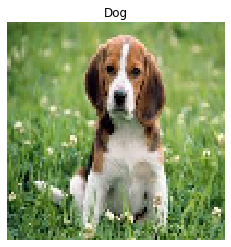

(1, 100, 100, 3)
1


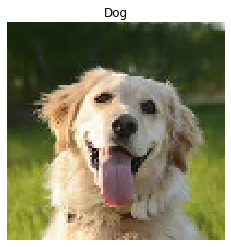

(1, 100, 100, 3)
0


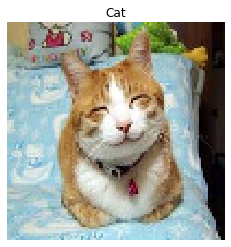

(1, 100, 100, 3)
0


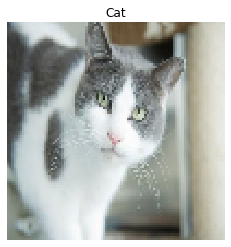

(1, 100, 100, 3)
0


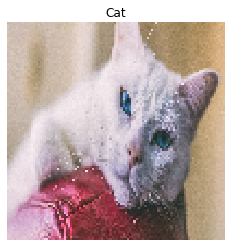

(1, 100, 100, 3)
1


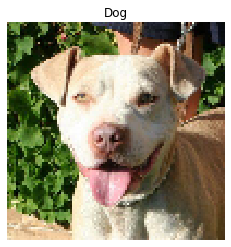

In [35]:
testing = []
testing.append("test9.jpg")
testing.append("test10.jpg")
testing.append("test6.jpg")
testing.append("test7.jpg")
testing.append("test8.jpg")
testing.append("test12.jpg")
predict_class(mymodel, testing, True)

In [15]:
#import h5py

In [16]:
#model_json = mymodel.to_json()
#with open("ASIRA_model.json", "w") as json_file:
    #json_file.write(model_json)

In [17]:
#mymodel.save_weights("ASIRA_model_weights.h5")
#print("Saved")# Weights give nearly 95 above train accuracy and 83.9 validation accuracy 

Saved
